In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv("C:/Users/shpva/OneDrive/Desktop/IndependentStudy_CIS5369/SM_Weather (4).csv",index_col='Date',parse_dates=True)
df = df.filter(['Date','TempAvg'])
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (239, 1)


,TempAvg
Date,
2021-10-01,61.4
2021-10-02,59.1
2021-10-03,61.5
2021-10-04,66.1
2021-10-05,69.6


<AxesSubplot:xlabel='Date'>

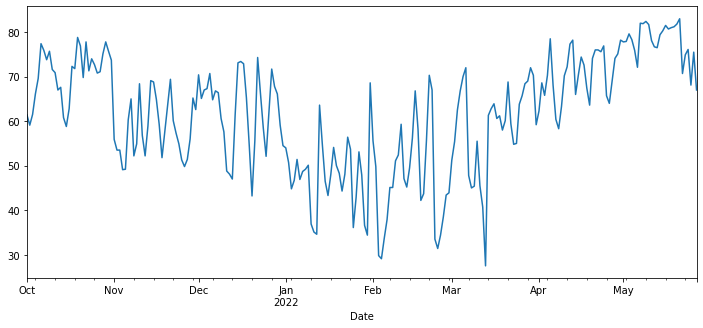

In [7]:
df['TempAvg'].plot(figsize=(12,5))

In [8]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)

In [9]:
adf_test(df['TempAvg'])

1. ADF :  -2.91308009226449
2. P-Value :  0.04384796674476201
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 235
5. Critical Values :
	 1% :  -3.4584868856997004
	 5% :  -2.873918902362675
	 10% :  -2.573367247623359


In [10]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [13]:
stepwise_fit = auto_arima(df['TempAvg'], suppress_warnings=True)           
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  239
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -800.000
Date:                Sat, 09 Jul 2022   AIC                           1608.000
Time:                        23:50:24   BIC                           1621.889
Sample:                             0   HQIC                          1613.598
                                - 239                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6983      0.069     10.089      0.000       0.563       0.834
ar.L2         -0.2851      0.069     -4.145      0.000      -0.420      -0.150
ma.L1         -0.8670      0.050    -17.411      0.000      -0.965      -0.769
sigma2        48.4700      3.847     12.600      0.000      40.930      56.010
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                46.55
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             0.08
Prob(H) (two-sided):                  0.61   Kurtosis:                         5.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
from statsmodels.tsa.arima_model import ARIMA

In [15]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(239, 1)
(209, 1) (30, 1)
TempAvg    74.1
Name: 2022-04-28 00:00:00, dtype: float64 TempAvg    67.0
Name: 2022-05-27 00:00:00, dtype: float64


In [46]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['TempAvg'],order=(1,1,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.TempAvg   No. Observations:                  208
Model:                 ARIMA(1, 1, 5)   Log Likelihood                -703.660
Method:                       css-mle   S.D. of innovations              7.109
Date:                Mon, 11 Jul 2022   AIC                           1423.320
Time:                        22:29:31   BIC                           1450.021
Sample:                    10-02-2021   HQIC                          1434.116
                         - 04-27-2022                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0164      0.111      0.148      0.882      -0.201       0.234
ar.L1.D.TempAvg    -0.6834      0.446     -1.531      0.126      -1.558       0.191
ma.L1.D.TempAvg     0.5346      0.451      1.186      0.236      -0.349       1.418
ma.L2.D.TempAvg    -0.4538      0.095     -4.767      0.000      -0.640      -0.267
ma.L3.D.TempAvg    -0.6111      0.145     -4.225      0.000      -0.895      -0.328
ma.L4.D.TempAvg    -0.2084      0.164     -1.270      0.204      -0.530       0.113
ma.L5.D.TempAvg     0.1031      0.072      1.430      0.153      -0.038       0.244
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4632           +0.0000j            1.4632            0.5000
MA.1           -1.2456           -0.0000j            1.2456           -0.5000
MA.2           -0.8114           -1.0848j            1.3547           -0.3522
MA.3           -0.8114           +1.0848j            1.3547            0.3522
MA.4            1.1278           -0.0000j            1.1278           -0.0000
MA.5            3.7622           -0.0000j            3.7622           -0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Date'>

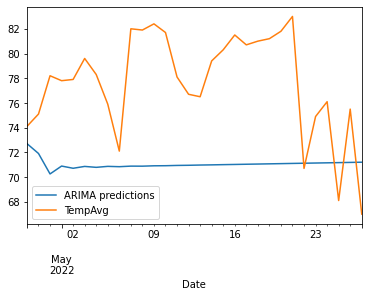

In [47]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['TempAvg'].plot(legend=True)

<AxesSubplot:xlabel='Date'>

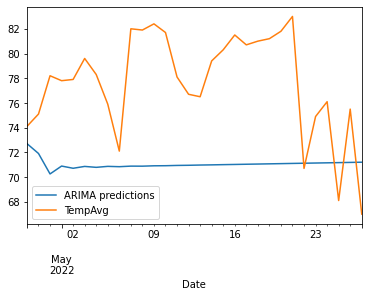

In [48]:
pred.plot(legend='ARIMA Predictions')
test['TempAvg'].plot(legend=True)

In [49]:
test['TempAvg'].mean()

77.65

In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['TempAvg']))
print(rmse)

7.699636087124995


In [37]:
model2=ARIMA(df['TempAvg'],order=(1,0,5))
model2=model2.fit()
df.tail()

,TempAvg
Date,
2022-05-23,74.9
2022-05-24,76.1
2022-05-25,68.1
2022-05-26,75.5
2022-05-27,67.0


In [38]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2018-12-30    70.449911
2018-12-31    70.595497
2019-01-01    73.667807
2019-01-02    73.865395
2019-01-03    72.806778
2019-01-04    72.679902
2019-01-05    72.554966
2019-01-06    72.431941
2019-01-07    72.310797
2019-01-08    72.191506
2019-01-09    72.074040
2019-01-10    71.958370
2019-01-11    71.844468
2019-01-12    71.732309
2019-01-13    71.621865
2019-01-14    71.513110
2019-01-15    71.406018
2019-01-16    71.300564
2019-01-17    71.196723
2019-01-18    71.094469
2019-01-19    70.993780
2019-01-20    70.894630
2019-01-21    70.796997
2019-01-22    70.700857
2019-01-23    70.606187
2019-01-24    70.512965
2019-01-25    70.421169
2019-01-26    70.330776
2019-01-27    70.241766
2019-01-28    70.154117
2019-01-29    70.067809
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

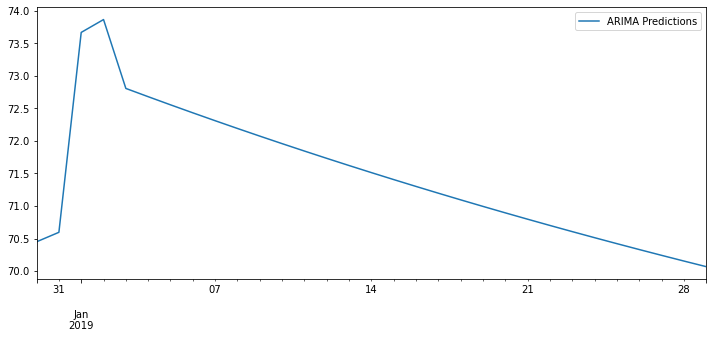

In [39]:
pred.plot(figsize=(12,5),legend=True)